In [ ]:
#-- Install required packages
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.9 MB 21.9 MB/s 
     |████████████████████████████████| 233 kB 45.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#-- Load required packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#-- Define basinc functions to simulate example data
#-- Slide 4

# function (1)
#-- sim_x is the function to simulate n random numbers from 0 to 1
def sim_x(n):                   
    x = np.random.random((n,1)) # U[0,1]
    return x

# function (2)
#-- true mean function
def f(x):
    true_y = 1 + 2*x + 5*np.sin(5*x)
    return true_y

#-- function (3)
#-- generate Y|X from N{f(x), sd}; N: normal distribution
# sd here is the standard deviation of error in observational data
# the error is assumed to be a Gaussian noise
def sim_y(x, sd):
    n = len(x)
    error = np.random.normal(0,1,n).reshape(n,1) # (n,) vector to (n,1) vector
    y = f(x) + error
    return y

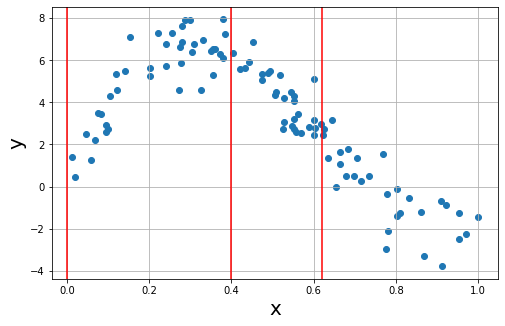

In [ ]:
#-- Slide 4 in Module 1
#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

#-- Plot the simulated x and y data
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.grid()

Slide 7 in Module 1, we can find a $\hat{\beta}_{1}$ and $\hat{\beta}_{0}$ that minimize the RSS using the following solutions:

$\hat{\beta}_0$=$\bar{y}-{\beta}_{1}\bar{x}$

$\hat{\beta}_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}$

$\bar{x}$ are $\bar{y}$ the average value of x and y we created from the last code line.

beta_0 = 6.53304262553922
beta_1 = -8.167049851722146


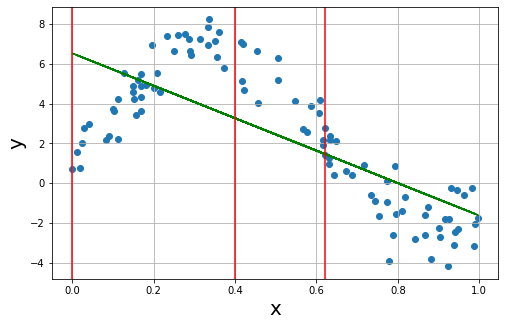

In [ ]:
#-- Slide 7 (left) in Module 1
x_bar = np.mean(x)
y_bar = np.mean(y)

beta_1 = np.sum((x-x_bar)*(y-y_bar))/np.sum((x-x_bar)**2)  # Eq. (1)
beta_0 = y_bar - beta_1*x_bar                              # Eq. (2)

print('beta_0 =',beta_0)
print('beta_1 =',beta_1)

y_hat = beta_0 + beta_1*x

# with these beta_0 and beta_1 paramters, we can plot the y_hat (predcited value of y)

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y)
plt.plot(x,y_hat, color='g')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.grid()


In Python, the function LinearRegression() can be used to calucate these $\beta_1$ and $\beta_0$.

In [ ]:
#-- Slide 7 (right) in Module 1
SLR_model = LinearRegression()
SLR_model.fit(x, y)

beta_0_f = SLR_model.intercept_
beta_1_f = SLR_model.coef_


print('beta_0 from the equation (1):', beta_0)
print('beta_1 from the equation (2):', beta_1)

print('beta_0 from the sklean lib:', beta_0_f[0])
print('beta_1 from the sklean lib:', beta_1_f[0][0])

beta_0 from the equation (1): 6.53304262553922
beta_1 from the equation (2): -8.167049851722146
beta_0 from the sklean lib: 6.53304262553922
beta_1 from the sklean lib: -8.167049851722146


Or, if you want to check more detailed regression results, you can use the statsmodels.api library as follows: 

In [ ]:
#-- Slide 8
X = sm.add_constant(x.ravel())
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           3.41e-18
Time:                        00:25:25   Log-Likelihood:                -225.80
No. Observations:                 100   AIC:                             455.6
Df Residuals:                      98   BIC:                             460.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5330      0.450     14.507      0.000       5.639       7.427
x1            -8.1670      0.762    -10.715      0.000      -9.680      -6.655
==============================================================================
Omnibus:                        1.022   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.075
Skew:                          -0.150   Prob(JB):                        0.584
Kurtosis:                       2.590   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

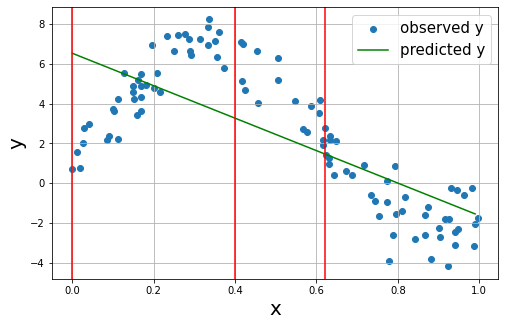

In [ ]:
#-- Slide 9
n = 100
xseq = np.arange(0,1,1/n).reshape(n,1)
y_pred = SLR_model.predict(xseq)

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed y')
plt.plot(xseq,y_pred, color='g', label="predicted y")

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines, grid, and legend
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.grid()
plt.legend(loc="upper right", fontsize=15)

In the slides 10 and 12 in Module 1, we define the quadratic model as follows:

$f(\mathbf{x} ; \boldsymbol{\beta})=\beta_{0}+\beta_{1} x+\beta_{2} x^{2}$

In the slide 13 in Module 1, we can find $\hat{\beta_0}$, $\hat{\beta_1}$, and $\hat{\beta_2}$ that minimize the RSS using the following solutions:

$\widehat{\boldsymbol{\beta}}=\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1} \mathbf{X}^{\mathrm{T}} \mathbf{Y}$

beta_0 = [2.78583166]
beta_1 = [16.53556127]
beta_2 = [-24.55551626]


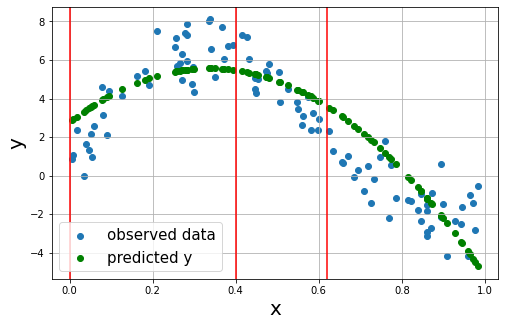

In [ ]:
#-- slide 14 (left)
n = 100
sd = 2

ones = np.ones((n,1))
x = sim_x(n)
x_2 = x**2 
y = sim_y(x, sd)

# best square solution (slide 13)
X = np.concatenate((ones, x,x_2), axis=1) #data structure
X_T = np.transpose(X)        #X^T
X_TX = np.matmul(X_T,X)      #X^TX
X_TX_I = np.linalg.inv(X_TX) #(X^TX)^(-1)
X_T_y = np.matmul(X_T, y).   # X^TY

beta_hat = np.matmul(X_TX_I, X_T_y) #beta hat
beta_0 = beta_hat[0]
beta_1 = beta_hat[1]
beta_2 = beta_hat[2]

print('beta_0 =', beta_0)
print('beta_1 =', beta_1)
print('beta_2 =', beta_2)

# with these beta_0, beta_1, and beta_2 paramters, we can plot the y_hat (predcited value of y)
ones = np.ones((n,1))
x = sim_x(n)
x_2 = x**2 
y = sim_y(x, sd)

y_hat = beta_0 + beta_1*x + beta_2*x_2

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed data')
plt.scatter(x,y_hat, color='g', label='predicted y')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.grid()
plt.legend(loc="lower left", fontsize=15)

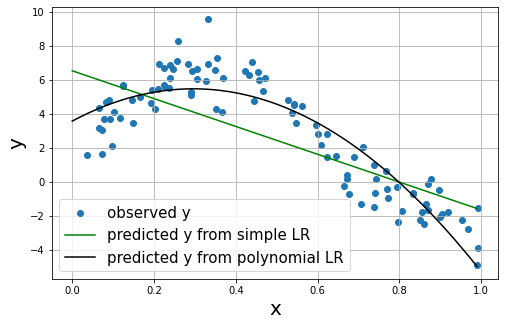

In [ ]:
#-- slide 14 (right)
n = 100
degree = 2

x = sim_x(n)
y = sim_y(x, sd)

xseq = np.arange(0,1,1/n).reshape(n,1)

poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly.fit(x,y)

y_pred_SLR  = SLR_model.predict(xseq)
y_pred_poly = poly.predict(xseq)

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed y')
plt.plot(xseq,y_pred_SLR, color='g', label="predicted y from simple LR")
plt.plot(xseq,y_pred_poly, color='k', label="predicted y from polynomial LR")

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add grid and legend
plt.grid()
plt.legend(loc="lower left", fontsize=15)

In [ ]:
#-- slide 15
n = 100
degree = 2

x = sim_x(n)
y_observed = sim_y(x, sd)

y_pred_SLR  = SLR_model.predict(x)
y_pred_poly = poly.predict(x)
MSE_SLR  = mean_squared_error(y_observed, y_pred_SLR)  # MSE for the simple linear regression model
MSE_poly = mean_squared_error(y_observed, y_pred_poly) # MSE for the linear regression model with polynomial terms

print('MSE SLR:', MSE_SLR)
print('MSE poly:', MSE_poly)

MSE SLR: 5.517382519203312
MSE poly: 2.6853870972960174


/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


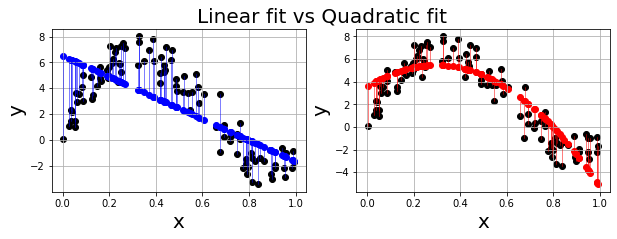

In [ ]:
#-- slide 16
Y_pred = np.concatenate((y_pred_SLR, y_pred_poly), axis=1)

fig, axs = plt.subplots(1,2) #fig is two figures' unique handles
fig.suptitle('Linear fit vs Quadratic fit', size=20)

fig = plt.gcf()          
fig.set_size_inches(10,3) # define the fig's size in inch

# subplot the linear/quadratic fits' predictions

for ax in range(2):
    axs[ax].scatter(x,y_observed, label='observed y', color='k')
    if ax==0:
        axs[ax].scatter(x,Y_pred[:,ax], color='b', label="predicted y from simple LR")
    else:
        axs[ax].scatter(x,Y_pred[:,ax], color='r', label="predicted y from simple LR")
    y_SLR_point = SLR_model.predict(x)

    #plt.plot(xseq,y_pred_poly, color='k', label="predicted y from polynomial LR")

    for i in range(len(x)):
        if ax==0:
            axs[ax].plot([x[i],x[i]], [Y_pred[i,ax], y_observed[i]],'b-', linewidth=0.5)
        else:
            axs[ax].plot([x[i],x[i]], [Y_pred[i,ax], y_observed[i]],'r-', linewidth=0.5)

    axs[ax].grid()
    axs[ax].set_xlabel('x', size=20)
    axs[ax].set_ylabel('y', size=20)


In [ ]:
#-- slide 17
n = 100
x = sim_x(n)
y = sim_y(x, sd)

xseq = np.arange(0,1,1/n/100).reshape(n*100,1)

degree_list = [1,2,3,5,10,20]
Y_pred_poly_d = np.zeros((len(xseq),len(degree_list)))
Y_pred_MSE = np.zeros((len(degree_list),2))

for i, d in enumerate(degree_list): # google "enumerate"
    poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly.fit(x,y)
    tpred = poly.predict(xseq)
    Y_pred_poly_d[:,i:i+1] = tpred
    tpred_for_MSE = poly.predict(x)
    Y_pred_MSE[i,0] = d
    Y_pred_MSE[i,1] = mean_squared_error(tpred_for_MSE, y)

[[ 1.          5.04343534]
 [ 2.          2.26690445]
 [ 3.          0.98572029]
 [ 5.          0.81140263]
 [10.          0.77591303]
 [20.          0.66054882]]


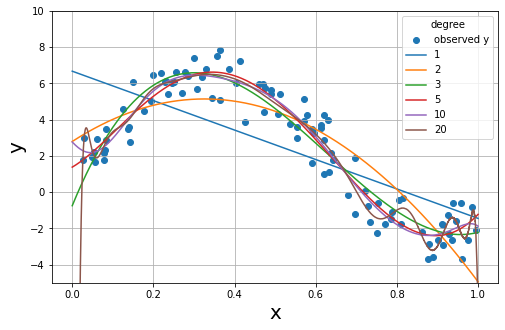

In [ ]:
#-- slide 17 (continued)
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed y')
plt.plot(xseq,Y_pred_poly_d,label=degree_list)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add grid and legend
plt.grid()
plt.legend(loc=0, title='degree')
plt.ylim([-5,10])

print(Y_pred_MSE)

In [ ]:
#-- slide 20 (knn)
n = 100
x = sim_x(n)
y = sim_y(x, sd)
xseq = np.arange(0,1,1/n).reshape(n,1)

k_list = [2,5,10,50,100]

Y_pred_knn = np.zeros((len(x),len(k_list)))
Y_pred_MSE_knn = np.zeros((len(k_list),2))

for i, k in enumerate(k_list): # google "enumerate"
    model_knn = KNeighborsRegressor(n_neighbors=k) # fit k for 2, 5, 10, 50, and 100
    model_knn.fit(x,y)
    tpred = model_knn.predict(sorted(x))

    Y_pred_knn[:,i:i+1] = tpred
    Y_pred_MSE_knn[i,0] = k
    Y_pred_MSE_knn[i,1] = mean_squared_error(tpred, y)

[[ 1.          5.04343534]
 [ 2.          2.26690445]
 [ 3.          0.98572029]
 [ 5.          0.81140263]
 [10.          0.77591303]
 [20.          0.66054882]]


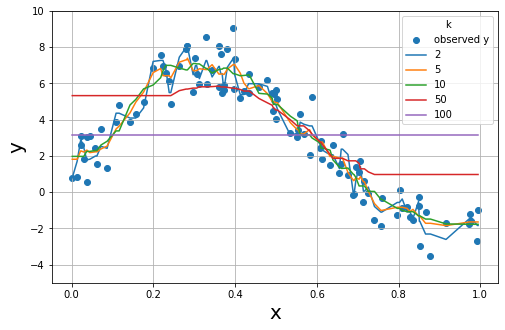

In [ ]:
#-- sldie 20 (knn; continued)
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed y')
plt.plot(sorted(x),Y_pred_knn,label=k_list)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add grid and legend
plt.grid()
plt.legend(loc=0, title='k')
plt.ylim([-5,10])


print(Y_pred_MSE)

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=20)
model_knn.fit(x,y)

KNeighborsRegressor(n_neighbors=20)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c300919-b3ac-478e-bd38-6c8fee450e26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>